In [30]:
# # Import Libraries:
# from datetime import datetime, timedelta # Datetime Feature
# import os #I
# import numpy as np # Import Numpy
# import pandas as pd # Import Pandas
# import panel as pn # Import Panel
# import plotly.express as px # Import Plotly
# from plotly.subplots import make_subplots
# pn.extension("plotly")# Import Plotly Extension
# from pprint import pprint
# import requests # To fetch data from our url API

# # Import and initialize coinmetrics API (in this case `cm` for the Coinmetrics Community API)
# import coinmetrics # Coinmetrics API
# cm = coinmetrics.Community()

# import alpaca_trade_api as tradeapi

In [2]:
import os
import requests
import numpy as np
import seaborn as sns
import pandas as pd # Import Pandas
import panel as pn # Import Panel
import plotly.graph_objects as go
import plotly.express as px # Import Plotly
from plotly.subplots import make_subplots
pn.extension("plotly")# Import Plotly Extension
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime, timedelta # Datetime Feature
import alpaca_trade_api as tradeapi


# COINMETRICS API
import coinmetrics # Coinmetrics API
cm = coinmetrics.Community()


Bad key savefig.frameon in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [3]:
# API INPUTS
asset = "btc"
begin_timestamp = (datetime.now() - timedelta(days=90)).date()
end_timestamp = (datetime.now() - timedelta(days=0)).date()
# end_timestamp = datetime.now().date()


# API OUTPUT (Coinmetrics Community URL API)
asset_data = requests.get(f"https://community-api.coinmetrics.io/v4/timeseries/market-candles?start_time={begin_timestamp}&end_time={end_timestamp}&paging_from=start&markets=coinbase-{asset}-usd-spot&pretty=true").json()
# pprint(asset_data)



In [4]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv('../../classkeys.env')

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [5]:
# Set the ticker
ticker = "SPY"
          
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes to same as coinmetrics data 
start_date = pd.Timestamp(begin_timestamp.isoformat(), tz="America/New_York").isoformat()
end_date = pd.Timestamp(end_timestamp.isoformat(), tz="America/New_York").isoformat()

# Get BTC duration of data for SPY
ticker_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df


ticker_data.head()

SPY                                     
                             open     high       low   close    volume
time                                                                  
2021-08-23 00:00:00-04:00  445.16  448.230  443.4355  447.26  49349485
2021-08-24 00:00:00-04:00  447.97  448.540  447.4200  447.95  33180117
2021-08-25 00:00:00-04:00  448.17  449.457  447.7700  448.88  35262175
2021-08-26 00:00:00-04:00  448.61  448.860  446.1600  446.27  53455704
2021-08-27 00:00:00-04:00  447.12  450.650  447.0600  450.19  54848833

In [6]:
ticker_data[''] = np.arange(len(ticker_data))
ticker_data.head()

SPY                                        
                             open     high       low   close    volume   
time                                                                     
2021-08-23 00:00:00-04:00  445.16  448.230  443.4355  447.26  49349485  0
2021-08-24 00:00:00-04:00  447.97  448.540  447.4200  447.95  33180117  1
2021-08-25 00:00:00-04:00  448.17  449.457  447.7700  448.88  35262175  2
2021-08-26 00:00:00-04:00  448.61  448.860  446.1600  446.27  53455704  3
2021-08-27 00:00:00-04:00  447.12  450.650  447.0600  450.19  54848833  4

In [7]:
ticker_data = ticker_data.set_index('')
ticker_data.head()

SPY                                     
     open     high       low   close    volume
                                              
0  445.16  448.230  443.4355  447.26  49349485
1  447.97  448.540  447.4200  447.95  33180117
2  448.17  449.457  447.7700  448.88  35262175
3  448.61  448.860  446.1600  446.27  53455704
4  447.12  450.650  447.0600  450.19  54848833

In [8]:
# Initiate clean dictionary
data_dictionary = {
    "date" : [],
    "open" : [],
    "close" : [],
    "high" : [],
    "low" : [],
    "volume" : [],
    "vwap" : [], 
}

# Use For Loop to interate through data and populate dictionary
for entry in asset_data['data']:
    data_dictionary['date'].append(entry['time'])
    data_dictionary['open'].append(float(entry['price_open']))
    data_dictionary['close'].append(float(entry['price_close']))
    data_dictionary['high'].append(float(entry['price_high']))
    data_dictionary['low'].append(float(entry['price_low']))
    data_dictionary['volume'].append(float(entry['volume']))
    data_dictionary['vwap'].append(float(entry['vwap']))

#Convert dictionary into Pandas dataframe and format to two decimals
asset_data_df = pd.DataFrame.from_dict(data_dictionary)
pd.options.display.float_format = "{:,.2f}".format
# INSERT HERE >>> FIND WAY TO CLEAN DATE DATA

# View dataframe
asset_data_df.head()


,date,open,close,high,low,volume,vwap
0,2021-08-22T00:00:00.000000000Z,"48,870.21","49,284.63","49,526.13","48,102.89","6,243.40","48,847.07"
1,2021-08-23T00:00:00.000000000Z,"49,284.38","49,506.50","50,505.00","49,012.84","10,824.27","49,881.69"
2,2021-08-24T00:00:00.000000000Z,"49,504.53","47,682.45","49,875.90","47,600.00","12,068.34","48,642.69"
3,2021-08-25T00:00:00.000000000Z,"47,682.45","48,987.33","49,277.00","47,122.02","9,289.23","48,212.27"
4,2021-08-26T00:00:00.000000000Z,"48,991.57","46,851.47","49,365.10","46,315.48","11,651.32","47,253.25"


## 

# Rolling Average

In [9]:
# date_asset_df = asset_data_df.set_index("date")
# date_asset_df

In [10]:
sp_btc_df = pd.concat([asset_data_df, ticker_data], axis="columns", join="inner")
sp_btc_df = sp_btc_df.set_index('date')
sp_btc_df.head()

,open,close,high,low,volume,vwap,"(SPY, open)","(SPY, high)","(SPY, low)","(SPY, close)","(SPY, volume)"
date,,,,,,,,,,,
2021-08-22T00:00:00.000000000Z,"48,870.21","49,284.63","49,526.13","48,102.89","6,243.40","48,847.07",445.16,448.23,443.44,447.26,49349485
2021-08-23T00:00:00.000000000Z,"49,284.38","49,506.50","50,505.00","49,012.84","10,824.27","49,881.69",447.97,448.54,447.42,447.95,33180117
2021-08-24T00:00:00.000000000Z,"49,504.53","47,682.45","49,875.90","47,600.00","12,068.34","48,642.69",448.17,449.46,447.77,448.88,35262175
2021-08-25T00:00:00.000000000Z,"47,682.45","48,987.33","49,277.00","47,122.02","9,289.23","48,212.27",448.61,448.86,446.16,446.27,53455704
2021-08-26T00:00:00.000000000Z,"48,991.57","46,851.47","49,365.10","46,315.48","11,651.32","47,253.25",447.12,450.65,447.06,450.19,54848833


### Calculate Daily Returns

In [11]:
daily_returns = sp_btc_df.pct_change().dropna()
daily_returns.head()

,open,close,high,low,volume,vwap,"(SPY, open)","(SPY, high)","(SPY, low)","(SPY, close)","(SPY, volume)"
date,,,,,,,,,,,
2021-08-23T00:00:00.000000000Z,0.01,0.00,0.02,0.02,0.73,0.02,0.01,0.00,0.01,0.00,-0.33
2021-08-24T00:00:00.000000000Z,0.00,-0.04,-0.01,-0.03,0.11,-0.02,0.00,0.00,0.00,0.00,0.06
2021-08-25T00:00:00.000000000Z,-0.04,0.03,-0.01,-0.01,-0.23,-0.01,0.00,-0.00,-0.00,-0.01,0.52
2021-08-26T00:00:00.000000000Z,0.03,-0.04,0.00,-0.02,0.25,-0.02,-0.00,0.00,0.00,0.01,0.03
2021-08-27T00:00:00.000000000Z,-0.04,0.05,-0.00,0.00,-0.23,0.01,0.01,0.01,0.01,0.00,-0.24


In [12]:
new_column = ['open', 'BTC', 'high', 'low', 'volume', 'vwap', 'sp_open', 'sp_high', 'sp_low', 'SP500', 'sp_volume']

In [13]:
daily_returns.columns = new_column

In [14]:
daily_returns=daily_returns.drop(columns=['open', 'high', 'low', 'volume', 'vwap', 'sp_open', 'sp_high', 'sp_low', 'sp_volume'])

In [15]:
daily_returns.head()

,BTC,SP500
date,,
2021-08-23T00:00:00.000000000Z,0.00,0.00
2021-08-24T00:00:00.000000000Z,-0.04,0.00
2021-08-25T00:00:00.000000000Z,0.03,-0.01
2021-08-26T00:00:00.000000000Z,-0.04,0.01
2021-08-27T00:00:00.000000000Z,0.05,0.00


### Evaluate Riskiness of Stocks

In [16]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(365)
volatility.sort_values(inplace=True)
volatility

SP500   0.13
BTC     0.72
dtype: float64

### Calculate Covariance of BTC vs S&P 500

In [17]:
# Calculate covariance of all daily returns of BTC vs. SP500
covariance = daily_returns['BTC'].cov(daily_returns['SP500'])
covariance

1.2457977559462028e-05

### Calculate Variance of SP500 Returns

In [18]:
variance = daily_returns['SP500'].var()
variance

4.7761501093615236e-05

### Calculate Beta of BTC

In [19]:
# Calculate beta of all daily returns of MSFT
btc_beta = covariance / variance
btc_beta

0.26083722819020466

### Calculate 30-Day Rolling Covariance of BTC Returns vs. S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of BTC Returns vs. S&P 500 Returns'}, xlabel='date'>

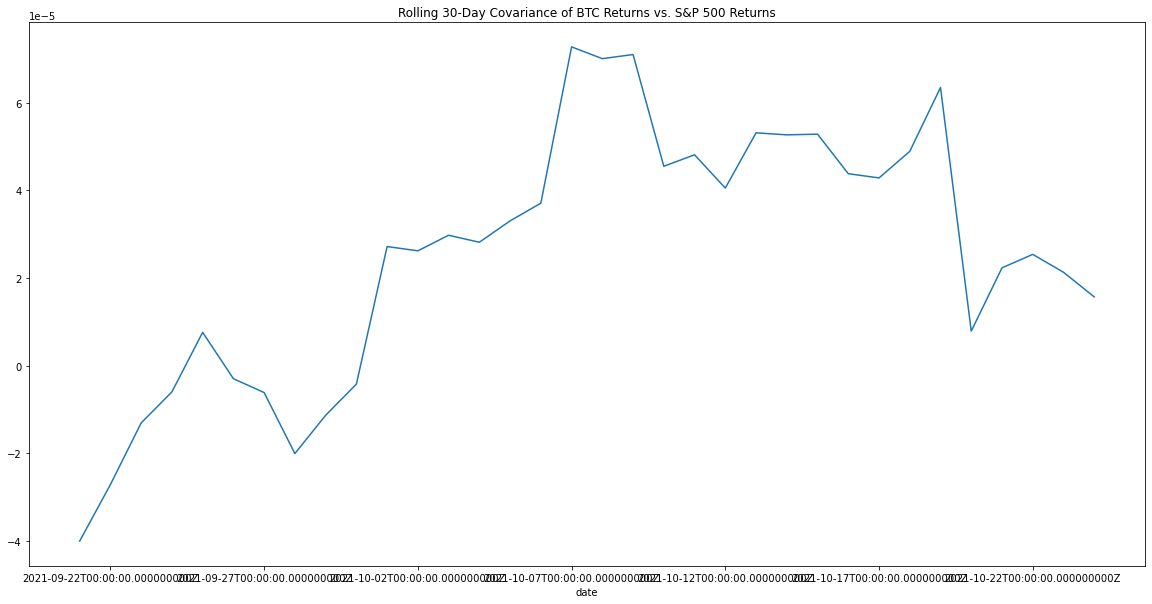

In [20]:
# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
rolling_covariance = daily_returns['BTC'].rolling(window=30).cov(daily_returns['SP500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of BTC Returns vs. S&P 500 Returns')

In [21]:
# # PLOTTING WITH PLOTLY

# # Initial a figure setup for supplots
# btc_beta = make_subplots(rows=3, cols=1) # Creating two tables on top of eachother with shared x axis

# # Puell Multiple items in row 1
# btc_beta.add_trace(go.Scatter(x=rolling_covariance['date'], y= rolling_covariance[""], line=dict (color='orange', width=.8), name = 'Rolling 30-Day Covariance of BTC Returns vs. S&P 500 Returns'), col=1, row=1)

# # # Price items in row 2
# # btc_beta.add_trace(go.Scatter(x=rolling_variance['date'], y= rolling_variance[""], line=dict (color='orange', width=.8), name = 'Rolling 30-Day Variance of S&P 500 Returns', ), col=1, row=2)

# # # in row 3
# # btc_beta.add_trace(go.Scatter(x=rolling_beta['date'], y= rolling_beta[""], line=dict (color='orange', width=.8), name = 'Rolling 30-Day Beta of BTC', ), col=1, row=2)


# # Global parameters to the entire chart
# btc_beta.update_layout(template="plotly_dark", title='BTC Beta',xaxis_title='Date',yaxis_title='BTC', height = 600)

# # Make the second chart in log
# btc_beta.update_yaxes(range=[-10, 200], row=2, col=1)


# btc_beta.show()

### Calculate 30-Day Rolling Variance of S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P 500 Returns'}, xlabel='date'>

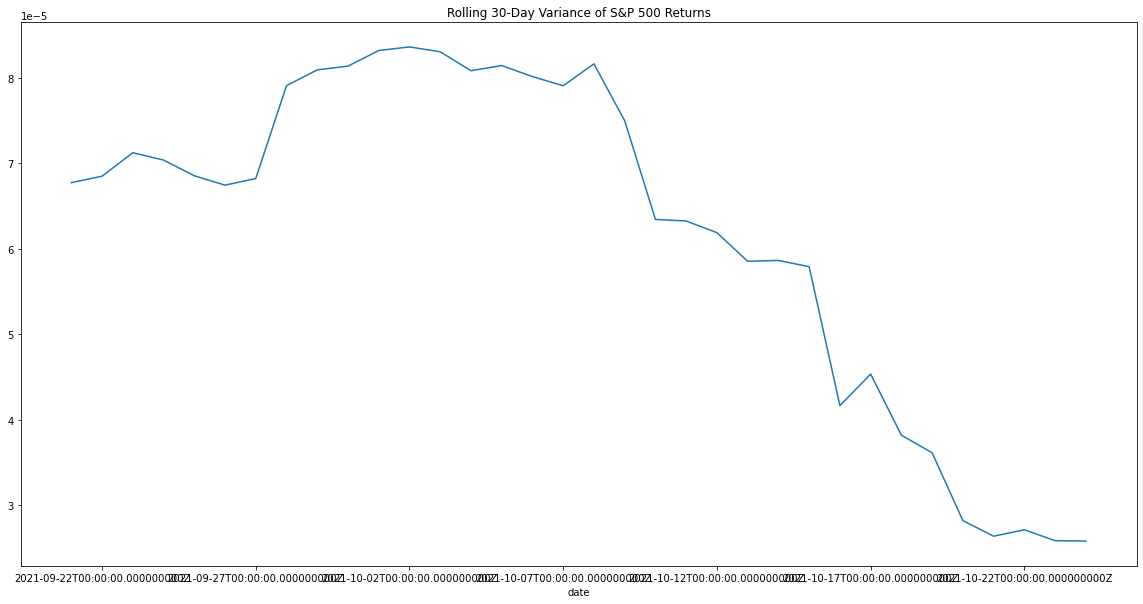

In [23]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
rolling_variance = daily_returns['SP500'].rolling(window=30).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

### Calculate 30-Day Rolling Beta of BTC

<AxesSubplot:title={'center':'Rolling 30-Day Beta of BTC'}, xlabel='date'>

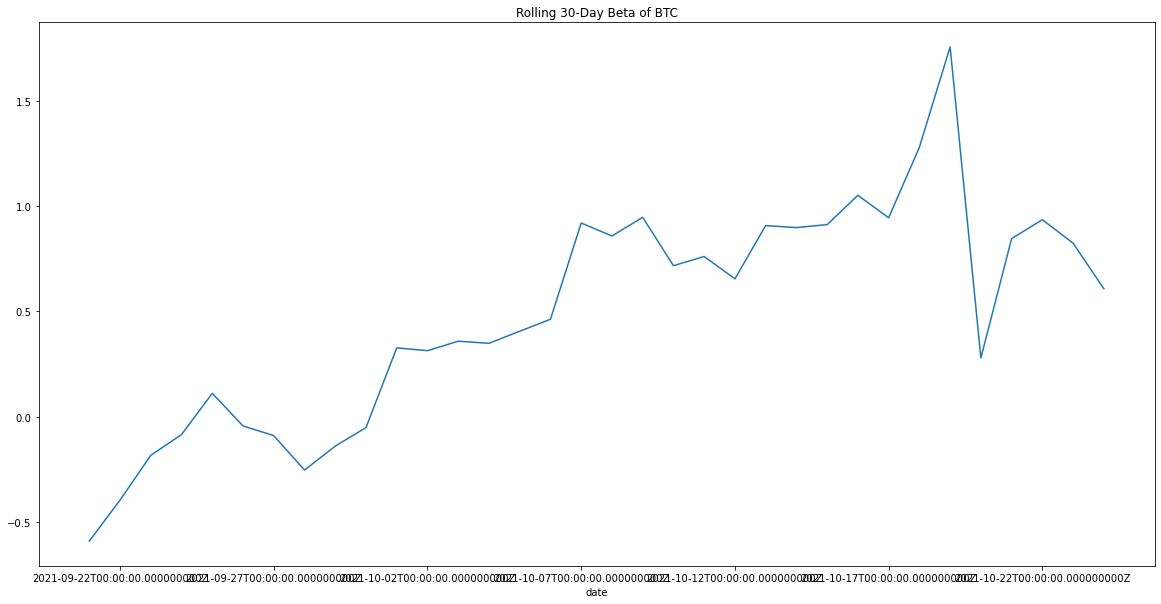

In [24]:
# Calculate 30-day rolling beta of BTC and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of BTC')

### Beta vs. Correlation

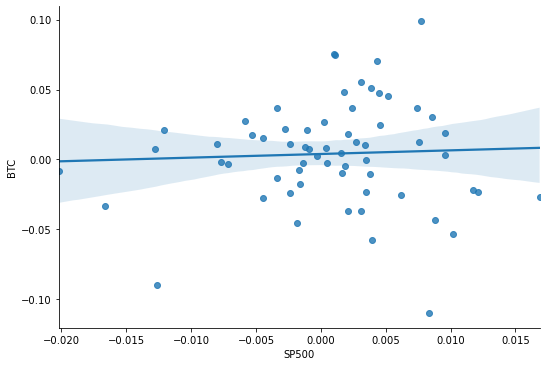

In [25]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
btc_vs_sp500 = sns.lmplot(x='SP500', y='BTC', data=daily_returns, aspect=1.5, fit_reg=True)
btc_vs_sp500

# RSI - Alex

# BOLLINGER BANDS - Alex

# MAC D - Saydee

# V Wap - Saydee

# Rolling Averages - Jeff

# SKDJ - Stochastic Oscillator - Anjan

# NVT - Network Value to Transaction

# The Puell Multiple - Brian / Jeff

# Sharpe Ratios

In [9]:
# Risk free rate doc saves in resources
# SAMPLE: risk_free_rate = 0.0000022
# combined_sharpe_ratios = ((combined_returns.mean()-(risk_free_rate)) * 252) / (combined_returns.std() * np.sqrt(252))
